In [1]:
# -*- coding: utf-8 -*-
# % Routines for opening face images and convert them to column vectors
# % by stacking the columns of the face matrix one beneath the other.
# %
# % Last modification: 10/08/2021
# % Author: Guilherme Barreto

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.stats import boxcox

# Matriz inicial 20*20

In [ ]:
#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']
# A função strvcat não é necessária em Python, a lista 'part3' já serve ao propósito.

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo
# Z e NAME são inicializados mais tarde ou não são usados da mesma forma.

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"individuo={i}") # Equivalente a 'individuo=i' no MATLAB para mostrar o progresso
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        # O código original não especifica a extensão, então vamos procurar por algumas comuns.
        file_path = None
        for ext in ['','.gif', '.pgm', '.jpg', '.png', '.jpeg']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # % le imagem

        Ar = cv2.resize(Img, (20, 20))   # % (Opcional) Redimensiona imagem

        An = Ar # % An=imnoise(Ar,'gaussian',0,0.005);  # (Opcional) adiciona ruido

        A = An.astype(np.float64) / 255.0  # % converte (im2double) para double precision

        a = A.flatten('F')  # % Etapa de vetorizacao: Empilhamento das colunas

        # %ROT=zeros(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (binario {0,1}, one-hot encoding)
        # %ROT=strcat(part1,int2str(i));
        # %ROT=-ones(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (bipolar {-1,+1})
        ROT = i   # % Rotulo = indice do individuo

        X.append(a) # % Coloca cada imagem vetorizada como coluna da matriz X (aqui, como linha de uma lista)
        Y.append(ROT) # % Coloca o rotulo de cada vetor como coluna da matriz Y (aqui, como item de uma lista)

# Convertendo as listas para arrays NumPy e ajustando as dimensões para corresponder ao MATLAB
X = np.array(X).T  # Transpõe para que cada coluna seja uma imagem
Y = np.array(Y)    # Y já está no formato correto (1D array)
"""
# %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
# A abordagem em Python usando Scikit-learn é um pouco diferente, mas alcança o mesmo resultado.
# Scikit-learn espera dados com amostras por linha, então transpomos X.
cov_matrix = np.cov(X) # Equivalente a cov(X') do MATLAB, pois X aqui já está transposto.
pca_skl = PCA() # Inicializa o PCA
pca_skl.fit(X.T) # Ajusta o PCA aos dados (amostras por linha)

# [V L VEi]=pcacov(cov(X'));
V = pca_skl.components_.T # Autovetores (componentes principais), como colunas
VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente

q = 25 # Número de componentes a manter
Vq = V[:, :q] # % Vq=V(:,1:q);
Qq = Vq.T # % Qq=Vq';
X = Qq @ X # % X=Qq*X; (usando @ para multiplicação de matrizes)

VEq = np.cumsum(VEi) # % VEq=cumsum(VEi);
plt.figure() # % figure;
plt.plot(VEq[:q], 'r-', linewidth=3) # % plot(VEq,'r-','linewidth',3); (plotamos até q componentes)
plt.xlabel('Autovalor') # % xlabel('Autovalor');
plt.ylabel('Variancia explicada acumulada') # % ylabel('Variancia explicada acumulada');
plt.show()
"""

Z = np.vstack([X, Y])  # % Z=[X;Y];  # Formato 01 vetor de atributos por coluna: DIM(Z) = (p+1)xN
Z = Z.T     # % Z=Z';     # Formato 01 vetor de atributos por linha: DIM(Z) = Nx(p+1)

np.savetxt('recfaces400.dat', Z, fmt='%f') # % save -ascii recfaces.dat Z

# %save -ascii yale1_input20x20.txt X
# %save -ascii yale1_output20x20.txt Y

print("\nProcesso concluído. Arquivo 'recfaces.dat' salvo.")

individuo=1
individuo=2
individuo=3
individuo=4
individuo=5
individuo=6
individuo=7
individuo=8
individuo=9
individuo=10
individuo=11
individuo=12
individuo=13
individuo=14
individuo=15

Processo concluído. Arquivo 'recfaces.dat' salvo.


# Matriz 20*20 normalizado [0,1]

In [3]:
# -*- coding: utf-8 -*-
# % Routines for opening face images and convert them to column vectors
# % by stacking the columns of the face matrix one beneath the other.
# %
# % Last modification: 10/08/2021 -> Adaptado para Python e com normalização
# % Author: Guilherme Barreto

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# As funções clear, clc, close all e pkg load image são específicas do ambiente MATLAB/Octave
# e não têm tradução direta ou necessária em um script Python padrão.

#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"Processando indivíduo={i}") # Equivalente a 'individuo=i' no MATLAB para mostrar o progresso
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        file_path = None
        for ext in ['','.gif', '.pgm', '.jpg', '.png', '.jpeg']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # % le imagem

        Ar = cv2.resize(Img, (20, 20))   # % (Opcional) Redimensiona imagem

        An = Ar # % An=imnoise(Ar,'gaussian',0,0.005);  # (Opcional) adiciona ruido

        A = An.astype(np.float64) / 255.0  # % converte (im2double) para double precision

        a = A.flatten('F')  # % Etapa de vetorizacao: Empilhamento das colunas

        ROT = i   # % Rotulo = indice do individuo

        X.append(a) # % Coloca cada imagem vetorizada como coluna da matriz X (aqui, como linha de uma lista)
        Y.append(ROT) # % Coloca o rotulo de cada vetor como coluna da matriz Y (aqui, como item de uma lista)

# Convertendo as listas para arrays NumPy e ajustando as dimensões para corresponder ao MATLAB
X = np.array(X).T  # Transpõe para que cada coluna seja uma imagem (formato: atributos x amostras)
Y = np.array(Y)    # Y já está no formato correto (1D array de rótulos)

# Descomente o bloco abaixo para aplicar a redução de dimensionalidade com PCA
"""
# %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
print("\nAplicando PCA...")
# A abordagem em Python usando Scikit-learn é um pouco diferente, mas alcança o mesmo resultado.
# Scikit-learn espera dados com amostras por linha, então transpomos X.
pca_skl = PCA() # Inicializa o PCA
pca_skl.fit(X.T) # Ajusta o PCA aos dados (amostras por linha)

# [V L VEi]=pcacov(cov(X'));
V = pca_skl.components_.T # Autovetores (componentes principais), como colunas
VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente

q = 25 # Número de componentes a manter
Vq = V[:, :q] # % Vq=V(:,1:q);
Qq = Vq.T # % Qq=Vq';
X = Qq @ X # % X=Qq*X; (usando @ para multiplicação de matrizes)
print(f"Reduzido para {q} componentes principais.")

VEq = np.cumsum(VEi) # % VEq=cumsum(VEi);
plt.figure() # % figure;
plt.plot(VEq[:q], 'r-', linewidth=3) # % plot(VEq,'r-','linewidth',3); (plotamos até q componentes)
plt.xlabel('Autovalor') # % xlabel('Autovalor');
plt.ylabel('Variancia explicada acumulada') # % ylabel('Variancia explicada acumulada');
plt.show()
"""

###########################################################
# % Fase 2 -- Normalização dos atributos para o intervalo [0,1]
###########################################################
print("\nNormalizando os atributos para o intervalo [0, 1]...")
# A normalização é aplicada a cada atributo (linha da matriz X) individualmente.
min_vals = np.min(X, axis=1, keepdims=True)
max_vals = np.max(X, axis=1, keepdims=True)
range_vals = max_vals - min_vals

# Adiciona um pequeno epsilon para evitar divisão por zero caso um atributo seja constante
X = (X - min_vals) / (range_vals + 1e-9)
print("Normalização concluída.")

###########################################################
# % Fase 3 -- Formatação e salvamento dos dados
###########################################################
# Junta os atributos (X) e os rótulos (Y)
Z = np.vstack([X, Y])  # % Z=[X;Y];  # Formato 01 vetor de atributos por coluna: DIM(Z) = (p+1)xN
Z = Z.T     # % Z=Z';     # Formato 01 vetor de atributos por linha: DIM(Z) = Nx(p+1)

# Salva a matriz final em um arquivo de texto
np.savetxt('recfaces400[0,1].dat', Z, fmt='%f') # % save -ascii recfaces.dat Z

print("\nProcesso finalizado. Arquivo 'recfaces400.dat' salvo com sucesso.")

Processando indivíduo=1
Processando indivíduo=2
Processando indivíduo=3
Processando indivíduo=4
Processando indivíduo=5
Processando indivíduo=6
Processando indivíduo=7
Processando indivíduo=8
Processando indivíduo=9
Processando indivíduo=10
Processando indivíduo=11
Processando indivíduo=12
Processando indivíduo=13
Processando indivíduo=14
Processando indivíduo=15

Normalizando os atributos para o intervalo [0, 1]...
Normalização concluída.

Processo finalizado. Arquivo 'recfaces400.dat' salvo com sucesso.


# Matriz 20*20 Z-score

In [4]:
# -*- coding: utf-8 -*-
# % Routines for opening face images and convert them to column vectors
# % by stacking the columns of the face matrix one beneath the other.
# %
# % Last modification: 28/07/2025 -> Adaptado para Python e com padronização Z-score
# % Author: Guilherme Barreto

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# As funções clear, clc, close all e pkg load image são específicas do ambiente MATLAB/Octave
# e não têm tradução direta ou necessária em um script Python padrão.

#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"Processando indivíduo={i}") # Equivalente a 'individuo=i' no MATLAB para mostrar o progresso
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        file_path = None
        for ext in ['','.gif', '.pgm', '.jpg', '.png', '.jpeg']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # % le imagem

        Ar = cv2.resize(Img, (20, 20))   # % (Opcional) Redimensiona imagem

        An = Ar # % An=imnoise(Ar,'gaussian',0,0.005);  # (Opcional) adiciona ruido

        A = An.astype(np.float64) / 255.0  # % converte (im2double) para double precision

        a = A.flatten('F')  # % Etapa de vetorizacao: Empilhamento das colunas

        ROT = i   # % Rotulo = indice do individuo

        X.append(a) # % Coloca cada imagem vetorizada como coluna da matriz X (aqui, como linha de uma lista)
        Y.append(ROT) # % Coloca o rotulo de cada vetor como coluna da matriz Y (aqui, como item de uma lista)

# Convertendo as listas para arrays NumPy e ajustando as dimensões para corresponder ao MATLAB
X = np.array(X).T  # Transpõe para que cada coluna seja uma imagem (formato: atributos x amostras)
Y = np.array(Y)    # Y já está no formato correto (1D array de rótulos)

# Descomente o bloco abaixo para aplicar a redução de dimensionalidade com PCA
"""
# %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
print("\nAplicando PCA...")
# A abordagem em Python usando Scikit-learn é um pouco diferente, mas alcança o mesmo resultado.
# Scikit-learn espera dados com amostras por linha, então transpomos X.
pca_skl = PCA() # Inicializa o PCA
pca_skl.fit(X.T) # Ajusta o PCA aos dados (amostras por linha)

# [V L VEi]=pcacov(cov(X'));
V = pca_skl.components_.T # Autovetores (componentes principais), como colunas
VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente

q = 25 # Número de componentes a manter
Vq = V[:, :q] # % Vq=V(:,1:q);
Qq = Vq.T # % Qq=Vq';
X = Qq @ X # % X=Qq*X; (usando @ para multiplicação de matrizes)
print(f"Reduzido para {q} componentes principais.")

VEq = np.cumsum(VEi) # % VEq=cumsum(VEi);
plt.figure() # % figure;
plt.plot(VEq[:q], 'r-', linewidth=3) # % plot(VEq,'r-','linewidth',3); (plotamos até q componentes)
plt.xlabel('Autovalor') # % xlabel('Autovalor');
plt.ylabel('Variancia explicada acumulada') # % ylabel('Variancia explicada acumulada');
plt.show()
"""

###########################################################
# % Fase 2 -- Normalização dos atributos (padrão Z-Score)
###########################################################
print("\nNormalizando os atributos (padrão Z-score)...")
# A padronização é aplicada a cada atributo (linha da matriz X) individualmente.
mean_vals = np.mean(X, axis=1, keepdims=True)
std_vals = np.std(X, axis=1, keepdims=True)

# Adiciona um pequeno epsilon para evitar divisão por zero caso o desvio padrão de um atributo seja 0
X = (X - mean_vals) / (std_vals)
print("Normalização concluída.")


###########################################################
# % Fase 3 -- Formatação e salvamento dos dados
###########################################################
# Junta os atributos (X) e os rótulos (Y)
Z = np.vstack([X, Y])  # % Z=[X;Y];  # Formato 01 vetor de atributos por coluna: DIM(Z) = (p+1)xN
Z = Z.T     # % Z=Z';     # Formato 01 vetor de atributos por linha: DIM(Z) = Nx(p+1)

# Salva a matriz final em um arquivo de texto
np.savetxt('recfaces400zscore.dat', Z, fmt='%f') # % save -ascii recfaces.dat Z

print("\nProcesso finalizado. Arquivo 'recfaces400.dat' salvo com sucesso.")

Processando indivíduo=1
Processando indivíduo=2
Processando indivíduo=3
Processando indivíduo=4
Processando indivíduo=5
Processando indivíduo=6
Processando indivíduo=7
Processando indivíduo=8
Processando indivíduo=9
Processando indivíduo=10
Processando indivíduo=11
Processando indivíduo=12
Processando indivíduo=13
Processando indivíduo=14
Processando indivíduo=15

Normalizando os atributos (padrão Z-score)...
Normalização concluída.

Processo finalizado. Arquivo 'recfaces400.dat' salvo com sucesso.


individuo=1
individuo=2
individuo=3
individuo=4
individuo=5
individuo=6
individuo=7
individuo=8
individuo=9
individuo=10
individuo=11
individuo=12
individuo=13
individuo=14
individuo=15


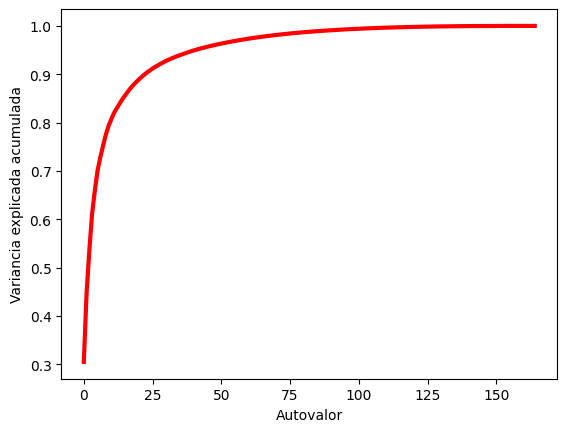


Processo concluído. Arquivo 'recfaces400PCA.dat' salvo.


In [5]:
#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']
# A função strvcat não é necessária em Python, a lista 'part3' já serve ao propósito.

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo
# Z e NAME são inicializados mais tarde ou não são usados da mesma forma.

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"individuo={i}") # Equivalente a 'individuo=i' no MATLAB para mostrar o progresso
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        # O código original não especifica a extensão, então vamos procurar por algumas comuns.
        file_path = None
        for ext in ['','.gif', '.pgm', '.jpg', '.png', '.jpeg']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # % le imagem

        Ar = cv2.resize(Img, (20, 20))   # % (Opcional) Redimensiona imagem

        An = Ar # % An=imnoise(Ar,'gaussian',0,0.005);  # (Opcional) adiciona ruido

        A = An.astype(np.float64) / 255.0  # % converte (im2double) para double precision

        a = A.flatten('F')  # % Etapa de vetorizacao: Empilhamento das colunas

        # %ROT=zeros(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (binario {0,1}, one-hot encoding)
        # %ROT=strcat(part1,int2str(i));
        # %ROT=-ones(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (bipolar {-1,+1})
        ROT = i   # % Rotulo = indice do individuo

        X.append(a) # % Coloca cada imagem vetorizada como coluna da matriz X (aqui, como linha de uma lista)
        Y.append(ROT) # % Coloca o rotulo de cada vetor como coluna da matriz Y (aqui, como item de uma lista)

# Convertendo as listas para arrays NumPy e ajustando as dimensões para corresponder ao MATLAB
X = np.array(X).T  # Transpõe para que cada coluna seja uma imagem
Y = np.array(Y)    # Y já está no formato correto (1D array)

# %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
# A abordagem em Python usando Scikit-learn é um pouco diferente, mas alcança o mesmo resultado.
# Scikit-learn espera dados com amostras por linha, então transpomos X.
cov_matrix = np.cov(X) # Equivalente a cov(X') do MATLAB, pois X aqui já está transposto.
pca_skl = PCA() # Inicializa o PCA
pca_skl.fit(X.T) # Ajusta o PCA aos dados (amostras por linha)

# [V L VEi]=pcacov(cov(X'));
V = pca_skl.components_.T # Autovetores (componentes principais), como colunas
VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente

q = 400 # Número de componentes a manter
Vq = V[:, :q] # % Vq=V(:,1:q);
Qq = Vq.T # % Qq=Vq';
X = Qq @ X # % X=Qq*X; (usando @ para multiplicação de matrizes)

VEq = np.cumsum(VEi) # % VEq=cumsum(VEi);
plt.figure() # % figure;
plt.plot(VEq[:q], 'r-', linewidth=3) # % plot(VEq,'r-','linewidth',3); (plotamos até q componentes)
plt.xlabel('Autovalor') # % xlabel('Autovalor');
plt.ylabel('Variancia explicada acumulada') # % ylabel('Variancia explicada acumulada');
plt.show()

Z = np.vstack([X, Y])  # % Z=[X;Y];  # Formato 01 vetor de atributos por coluna: DIM(Z) = (p+1)xN
Z = Z.T     # % Z=Z';     # Formato 01 vetor de atributos por linha: DIM(Z) = Nx(p+1)

np.savetxt('recfaces400PCA.dat', Z, fmt='%f') # % save -ascii recfaces.dat Z

# %save -ascii yale1_input20x20.txt X
# %save -ascii yale1_output20x20.txt Y

print("\nProcesso concluído. Arquivo 'recfaces400PCA.dat' salvo.")

individuo=1
individuo=2
individuo=3
individuo=4
individuo=5
individuo=6
individuo=7
individuo=8
individuo=9
individuo=10
individuo=11
individuo=12
individuo=13
individuo=14
individuo=15


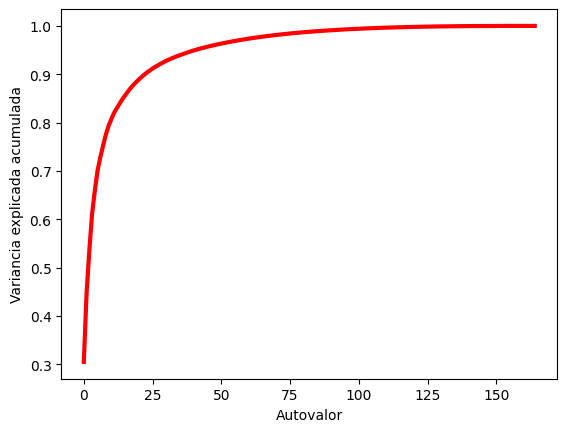


Processo concluído. Arquivo 'recfaces400PCA.dat' salvo.


In [6]:
#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']
# A função strvcat não é necessária em Python, a lista 'part3' já serve ao propósito.

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo
# Z e NAME são inicializados mais tarde ou não são usados da mesma forma.

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"individuo={i}") # Equivalente a 'individuo=i' no MATLAB para mostrar o progresso
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        # O código original não especifica a extensão, então vamos procurar por algumas comuns.
        file_path = None
        for ext in ['','.gif', '.pgm', '.jpg', '.png', '.jpeg']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # % le imagem

        Ar = cv2.resize(Img, (20, 20))   # % (Opcional) Redimensiona imagem

        An = Ar # % An=imnoise(Ar,'gaussian',0,0.005);  # (Opcional) adiciona ruido

        A = An.astype(np.float64) / 255.0  # % converte (im2double) para double precision

        a = A.flatten('F')  # % Etapa de vetorizacao: Empilhamento das colunas

        # %ROT=zeros(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (binario {0,1}, one-hot encoding)
        # %ROT=strcat(part1,int2str(i));
        # %ROT=-ones(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (bipolar {-1,+1})
        ROT = i   # % Rotulo = indice do individuo

        X.append(a) # % Coloca cada imagem vetorizada como coluna da matriz X (aqui, como linha de uma lista)
        Y.append(ROT) # % Coloca o rotulo de cada vetor como coluna da matriz Y (aqui, como item de uma lista)

# Convertendo as listas para arrays NumPy e ajustando as dimensões para corresponder ao MATLAB
X = np.array(X).T  # Transpõe para que cada coluna seja uma imagem
Y = np.array(Y)    # Y já está no formato correto (1D array)

# %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
# A abordagem em Python usando Scikit-learn é um pouco diferente, mas alcança o mesmo resultado.
# Scikit-learn espera dados com amostras por linha, então transpomos X.
cov_matrix = np.cov(X) # Equivalente a cov(X') do MATLAB, pois X aqui já está transposto.
pca_skl = PCA() # Inicializa o PCA
pca_skl.fit(X.T) # Ajusta o PCA aos dados (amostras por linha)

# [V L VEi]=pcacov(cov(X'));
V = pca_skl.components_.T # Autovetores (componentes principais), como colunas
VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente

q = 400 # Número de componentes a manter
Vq = V[:, :q] # % Vq=V(:,1:q);
Qq = Vq.T # % Qq=Vq';
X = Qq @ X # % X=Qq*X; (usando @ para multiplicação de matrizes)

VEq = np.cumsum(VEi) # % VEq=cumsum(VEi);
plt.figure() # % figure;
plt.plot(VEq[:q], 'r-', linewidth=3) # % plot(VEq,'r-','linewidth',3); (plotamos até q componentes)
plt.xlabel('Autovalor') # % xlabel('Autovalor');
plt.ylabel('Variancia explicada acumulada') # % ylabel('Variancia explicada acumulada');
plt.show()

Z = np.vstack([X, Y])  # % Z=[X;Y];  # Formato 01 vetor de atributos por coluna: DIM(Z) = (p+1)xN
Z = Z.T     # % Z=Z';     # Formato 01 vetor de atributos por linha: DIM(Z) = Nx(p+1)

np.savetxt('recfaces400PCA.dat', Z, fmt='%f') # % save -ascii recfaces.dat Z

# %save -ascii yale1_input20x20.txt X
# %save -ascii yale1_output20x20.txt Y

print("\nProcesso concluído. Arquivo 'recfaces400PCA.dat' salvo.")

In [7]:
#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo

# Supondo que as imagens estão em uma pasta chamada 'images'
# Se a pasta não existir, crie-a para evitar erros.
if not os.path.exists('images'):
    print("A pasta 'images' não foi encontrada. Crie a pasta e adicione as imagens de face para o código funcionar.")
    # Exemplo de como criar a pasta se necessário
    # os.makedirs('images') 
    # Este script não funcionará sem as imagens.

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"Processando indivíduo={i}")
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        file_path = None
        # O código original busca por .gif, mas vamos procurar por outras extensões comuns
        for ext in ['.gif', '.pgm', '.jpg', '.png', '.jpeg', '']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break
        
        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        try:
            Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if Img is None:
                print(f"Aviso: Não foi possível ler a imagem '{file_path}'. Pulando.")
                continue

            Ar = cv2.resize(Img, (20, 20))
            An = Ar
            A = An.astype(np.float64) / 255.0
            a = A.flatten('F')
            ROT = i

            X.append(a)
            Y.append(ROT)
        except Exception as e:
            print(f"Erro ao processar o arquivo {file_path}: {e}")


# Se nenhuma imagem foi carregada, o script não pode continuar.
if not X:
    print("\nNenhuma imagem foi carregada. Verifique se a pasta 'images' contém os arquivos corretos e tente novamente.")
else:
    # Convertendo as listas para arrays NumPy
    X = np.array(X).T
    Y = np.array(Y)

    # %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
    pca_skl = PCA()
    pca_skl.fit(X.T) # Scikit-learn espera amostras por linha

    V = pca_skl.components_.T # Autovetores (componentes principais)
    VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente
    VEq = np.cumsum(VEi) # Variância explicada acumulada

    # --- MODIFICAÇÃO PRINCIPAL ---
    # Encontra o número de componentes para explicar 98% da variância
    target_variance = 0.98
    q = np.argmax(VEq >= target_variance) + 1
    print(f"\nNúmero de componentes para atingir {target_variance*100}% da variância: {q}")
    # ---------------------------

    Vq = V[:, :q]
    Qq = Vq.T
    X_pca = Qq @ X # Projeta os dados no novo espaço de componentes

    # Plotando a variância explicada acumulada
    plt.figure(figsize=(10, 6))
    plt.plot(VEq, 'r-', linewidth=2, label='Variância Acumulada')
    plt.axhline(y=target_variance, color='b', linestyle='--', label=f'{target_variance*100}% da Variância')
    plt.axvline(x=q, color='g', linestyle='--', label=f'{q} Componentes')
    plt.title('Variância Explicada Acumulada pelos Componentes Principais')
    plt.xlabel('Número de Componentes Principais')
    plt.ylabel('Variância Explicada Acumulada')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(VEq))
    plt.legend()
    plt.grid(True)
    plt.savefig('variancia_acumulada.png') # Salva o gráfico em um arquivo
    plt.close() # Fecha a figura para não exibir interativamente

    Z = np.vstack([X_pca, Y])
    Z = Z.T

    output_filename = f'recfaces400PCA98var.dat'
    np.savetxt(output_filename, Z, fmt='%f')

    print(f"\nProcesso concluído.")
    print(f"O gráfico da variância foi salvo como 'variancia_acumulada.png'.")
    print(f"O arquivo de dados foi salvo como '{output_filename}'.")

Processando indivíduo=1
Processando indivíduo=2
Processando indivíduo=3
Processando indivíduo=4
Processando indivíduo=5
Processando indivíduo=6
Processando indivíduo=7
Processando indivíduo=8
Processando indivíduo=9
Processando indivíduo=10
Processando indivíduo=11
Processando indivíduo=12
Processando indivíduo=13
Processando indivíduo=14
Processando indivíduo=15

Número de componentes para atingir 98.0% da variância: 69

Processo concluído.
O gráfico da variância foi salvo como 'variancia_acumulada.png'.
O arquivo de dados foi salvo como 'recfaces400PCA98var.dat'.


In [2]:
#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo

# Supondo que as imagens estão em uma pasta chamada 'images'
# Se a pasta não existir, crie-a para evitar erros.
if not os.path.exists('images'):
    print("A pasta 'images' não foi encontrada. Crie a pasta e adicione as imagens de face para o código funcionar.")
    # Exemplo de como criar a pasta se necessário
    # os.makedirs('images')
    # Este script não funcionará sem as imagens.

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"Processando indivíduo={i}")
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        file_path = None
        # O código original busca por .gif, mas vamos procurar por outras extensões comuns
        for ext in ['.gif', '.pgm', '.jpg', '.png', '.jpeg', '']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        try:
            Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if Img is None:
                print(f"Aviso: Não foi possível ler a imagem '{file_path}'. Pulando.")
                continue

            Ar = cv2.resize(Img, (20, 20))
            An = Ar
            A = An.astype(np.float64) / 255.0
            a = A.flatten('F')
            ROT = i

            X.append(a)
            Y.append(ROT)
        except Exception as e:
            print(f"Erro ao processar o arquivo {file_path}: {e}")


# Se nenhuma imagem foi carregada, o script não pode continuar.
if not X:
    print("\nNenhuma imagem foi carregada. Verifique se a pasta 'images' contém os arquivos corretos e tente novamente.")
else:
    # Convertendo as listas para arrays NumPy
    X = np.array(X).T
    Y = np.array(Y)

    # --- MODIFICAÇÃO PRINCIPAL (BOX-COX) ---
    print("\nAplicando a transformação Box-Cox nos dados...")
    # A transformação Box-Cox requer que os dados sejam estritamente positivos.
    # Adicionamos uma pequena constante para evitar valores iguais a zero.
    offset = 1e-6
    X_positive = X + offset

    # Aplicamos a transformação para cada característica (pixel) individualmente.
    X_boxcox = np.zeros_like(X_positive)
    for i in range(X_positive.shape[0]):
        X_boxcox[i, :], _ = boxcox(X_positive[i, :])
    print("Transformação Box-Cox concluída.")
    # ------------------------------------

    # %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
    # O PCA será executado nos dados transformados por Box-Cox
    pca_skl = PCA()
    pca_skl.fit(X_boxcox.T) # Scikit-learn espera amostras por linha

    V = pca_skl.components_.T # Autovetores (componentes principais)
    VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente
    VEq = np.cumsum(VEi) # Variância explicada acumulada

    # Encontra o número de componentes para explicar 98% da variância
    target_variance = 0.98
    q = np.argmax(VEq >= target_variance) + 1
    print(f"\nNúmero de componentes para atingir {target_variance*100}% da variância: {q}")

    Vq = V[:, :q]
    Qq = Vq.T
    # Projeta os dados transformados por Box-Cox no novo espaço de componentes
    X_pca = Qq @ X_boxcox

    # Plotando a variância explicada acumulada
    plt.figure(figsize=(10, 6))
    plt.plot(VEq, 'r-', linewidth=2, label='Variância Acumulada')
    plt.axhline(y=target_variance, color='b', linestyle='--', label=f'{target_variance*100}% da Variância')
    plt.axvline(x=q, color='g', linestyle='--', label=f'{q} Componentes')
    plt.title('Variância Explicada Acumulada (após Box-Cox)')
    plt.xlabel('Número de Componentes Principais')
    plt.ylabel('Variância Explicada Acumulada')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(VEq))
    plt.legend()
    plt.grid(True)
    plt.savefig('variancia_acumulada_boxcox.png') # Salva o gráfico em um arquivo
    plt.close() # Fecha a figura para não exibir interativamente

    Z = np.vstack([X_pca, Y])
    Z = Z.T

    output_filename = f'recfaces400PCA98var_boxcox.dat'
    np.savetxt(output_filename, Z, fmt='%f')

    print(f"\nProcesso concluído.")
    print(f"O gráfico da variância foi salvo como 'variancia_acumulada_boxcox.png'.")
    print(f"O arquivo de dados foi salvo como '{output_filename}'.")

Processando indivíduo=1
Processando indivíduo=2
Processando indivíduo=3
Processando indivíduo=4
Processando indivíduo=5
Processando indivíduo=6
Processando indivíduo=7
Processando indivíduo=8
Processando indivíduo=9
Processando indivíduo=10
Processando indivíduo=11
Processando indivíduo=12
Processando indivíduo=13
Processando indivíduo=14
Processando indivíduo=15

Aplicando a transformação Box-Cox nos dados...
Transformação Box-Cox concluída.

Número de componentes para atingir 98.0% da variância: 63

Processo concluído.
O gráfico da variância foi salvo como 'variancia_acumulada_boxcox.png'.
O arquivo de dados foi salvo como 'recfaces400PCA98var_boxcox.dat'.
